# SMS Spam Detection

## Various ML estimator performance comparisons


In [1]:
# Add your generic imports here

import os
import pandas as pd
import numpy as np
import xml.etree.ElementTree as ET
import matplotlib as mpl
import matplotlib.pyplot as plt
from string import punctuation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import nltk
from wordcloud import WordCloud
import seaborn as sns
from scipy import sparse

%matplotlib inline


In [78]:
# Add your ML imports here

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import VotingClassifier

In [3]:
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/msiddiqui353/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/msiddiqui353/nltk_data...


[nltk_data]   Package punkt is already up-to-date!


In [4]:
project_path = os.getcwd() + '/'

DATA_PATH = 'data/'
browser_data_path = DATA_PATH
pycharm_data_path = project_path + DATA_PATH

# selected_data_path = browser_data_path
selected_data_path = pycharm_data_path

kaggle_data_path = selected_data_path + 'kaggle_spam.csv'
dit_data_path = selected_data_path + 'dit_spam.xml'


### Let's check out the first dataset that we have

In [5]:
kaggle_data = pd.read_csv(kaggle_data_path, encoding='latin-1')

kaggle_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
# Converts XML to DF

def xml2df(xml_data):
    root = ET.XML(xml_data) # element tree
    all_records = []
    for i, child in enumerate(root):
        record = {}
        for subchild in child:
            record[subchild.tag] = subchild.text
            all_records.append(record)
    return pd.DataFrame(all_records)

### The second dataset is in xml format, so let's parse it into a Dataframe

In [7]:
dit_data_xml = open(dit_data_path).read()

dit_data = xml2df(dit_data_xml)

dit_data.head()

,class,date,number,source,text
0,spam,NaN,NaN,almeida,Free entry in 2 a wkly comp to win FA Cup fina...
1,spam,NaN,NaN,almeida,Free entry in 2 a wkly comp to win FA Cup fina...
2,spam,NaN,NaN,almeida,Free entry in 2 a wkly comp to win FA Cup fina...
3,spam,NaN,NaN,almeida,FreeMsg Hey there darling it's been 3 week's n...
4,spam,NaN,NaN,almeida,FreeMsg Hey there darling it's been 3 week's n...


### Remove unnecessary columns and rename some to help with consistency

In [8]:
kaggle_cleansed_data = kaggle_data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
kaggle_cleansed_data = kaggle_cleansed_data.rename(columns={'v1': 'class', 'v2': 'message'})


dit_cleansed_data = dit_data.drop(['date', 'number', 'source'], axis=1)
dit_cleansed_data = dit_cleansed_data.rename(columns={'text': 'message'})

In [9]:
kaggle_cleansed_data.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
dit_cleansed_data.head()

,class,message
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,spam,FreeMsg Hey there darling it's been 3 week's n...
4,spam,FreeMsg Hey there darling it's been 3 week's n...


### Now let's combine both datasets into a single frame

In [11]:
combined_norm_data = pd.concat([kaggle_cleansed_data, dit_cleansed_data], ignore_index=True)

combined_norm_data.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### A basic description on the number of 'spam' and 'ham' messages we have with us

In [12]:
combined_norm_data.groupby('class').describe()

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th colspan="4" halign="left">message</th>
    </tr>
    <tr>
      <th></th>
      <th>count</th>
      <th>unique</th>
      <th>top</th>
      <th>freq</th>
    </tr>
    <tr>
      <th>class</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>ham</th>
      <td>4825</td>
      <td>4516</td>
      <td>Sorry, I'll call later</td>
      <td>30</td>
    </tr>
    <tr>
      <th>spam</th>
      <td>5954</td>
      <td>1590</td>
      <td>Camera - You are awarded a SiPix Digital Camer...</td>
      <td>6</td>
    </tr>
  </tbody>
</table>
</div>

### We'll also factor in the length of the each message as a feature

In [13]:
combined_norm_data['length'] = combined_norm_data['message'].apply(len)
combined_norm_data.head()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fea55222990>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fea5897aad0>], dtype=object)

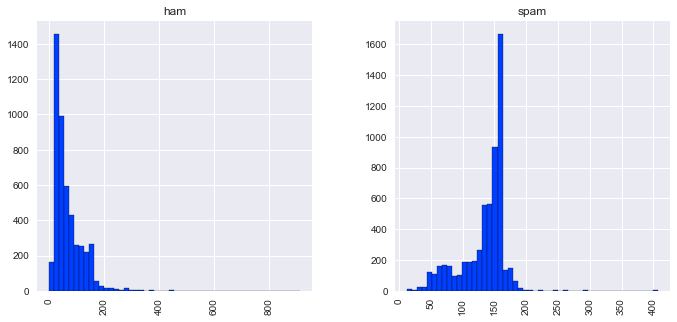

In [15]:
mpl.rcParams['patch.force_edgecolor'] = True
plt.style.use('seaborn-bright')
combined_norm_data.hist(column='length', by='class', bins=50,figsize=(11,5))


#### It's interesting to note that Spam messages are generally longer when compared to ham ones

### Let's build a wordcloud to help us visualize about our data even better

In [16]:
message_df = combined_norm_data.copy().drop(['length'], axis=1)

message_df.head()


,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### We should strip out the punctuations to help us focus only the words in a sentence

In [17]:
def strip_punctuation(s):
    return ''.join(c for c in s if c not in punctuation)


### We should also remove stop words from each of message to avoid polluting our final results

In [18]:
def process_text(text):
    
    text = strip_punctuation(text)
    text = [word for word in text.split() if word.lower() not in nltk.corpus.stopwords.words('english')]
    
    return " ".join(text)

In [19]:
message_df['message'] = message_df['message'].apply(process_text)

message_df.head()

,class,message
0,ham,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar Joking wif u oni
2,spam,Free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say early hor U c already say
4,ham,Nah dont think goes usf lives around though


In [20]:
spam_df = message_df[message_df['class'] == 'spam']
ham_df = message_df[message_df['class'] == 'ham']

In [21]:
ham_words = ''
spam_words = ''

for val in spam_df['message']:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        spam_words = spam_words + words + ' '
        
for val in ham_df['message']:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        ham_words = ham_words + words + ' '

In [22]:
# Generate a word cloud image
spam_wordcloud = WordCloud(width=600, height=400).generate(spam_words)
ham_wordcloud = WordCloud(width=600, height=400).generate(ham_words)

#### SPAM Wordcloud

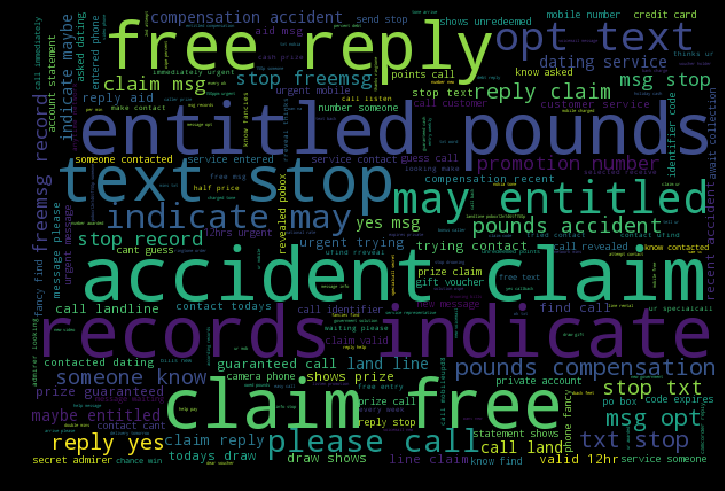

In [24]:
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#### HAM Wordcloud

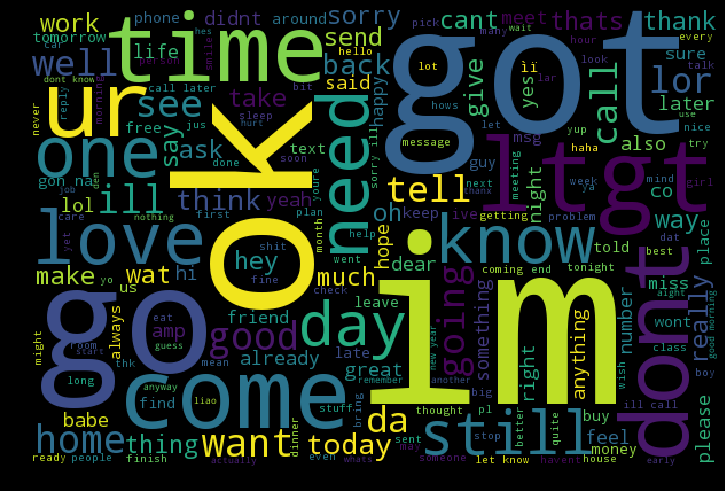

In [26]:
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Let's now use Tfidf to help extract out weights per word which will also act as our features / dimensions

In [27]:
vectorizer = TfidfVectorizer("english")

In [28]:
feat_tfidf = vectorizer.fit_transform(message_df['message'])


### If we recall, we also had message length as a feature, so let's combine that into our feature set extracted above

In [29]:
length_matrix = combined_norm_data['length'].as_matrix()
feat_tfidf_length = sparse.csr_matrix(np.hstack((feat_tfidf.todense(), length_matrix[:, None])))


In [30]:
print(feat_tfidf.get_shape())

print(feat_tfidf_length.get_shape())


(10779, 10328)
(10779, 10329)


### Time to split our data into a 70 - 30 ratio, where 70% of the dataset will be used for training and the rest will be used for testing / validating our data.

In [31]:
feat_tfidf_train, feat_tfidf_test, label_tfidf_train, label_tfidf_test = train_test_split(
    feat_tfidf, 
    message_df['class'], 
    test_size=0.3, 
    random_state=111
)

feat_tfidf_len_train, feat_tfidf_len_test, label_tfidf_len_train, label_tfidf_len_test = train_test_split(
    feat_tfidf_length, 
    message_df['class'], 
    test_size=0.3, 
    random_state=111
)



### Here comes the fun part ! Let us bring in some common machine learning classifiers and for the sake of simplicity leave them with the default parameters to see how well they perform

In [32]:
svc = SVC()
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
bc = BaggingClassifier()
etc = ExtraTreesClassifier()

In [33]:
clfs = {
    'SVC': svc,
    'KN': knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc
}

In [33]:
def train_classifier(clf, feature_train, labels_train):    
    clf.fit(feature_train, labels_train)

In [35]:
def predict_labels(clf, features):
    return clf.predict(features)

In [36]:
predicted_scores = []
predicted_models = {}

In [37]:
def predict_models(classifiers, pred_scores, pred_models, x_train, y_train, x_test, y_test):
    for k, v in classifiers.items():
        print('starting...', k)
        train_classifier(v, x_train, y_train)
        pred_models[k] = predict_labels(v, x_test)
        pred_scores.append((k, [accuracy_score(y_test, pred_models[k])]))
        print(k, 'Done !')


In [38]:
predict_models(
    clfs, 
    predicted_scores, 
    predicted_models, 
    feat_tfidf_train, 
    label_tfidf_train, 
    feat_tfidf_test, 
    label_tfidf_test
)

('starting...', 'ETC')


('ETC', 'Done !')
('starting...', 'RF')


('RF', 'Done !')
('starting...', 'BgC')


('BgC', 'Done !')
('starting...', 'LR')
('LR', 'Done !')
('starting...', 'AdaBoost')


('AdaBoost', 'Done !')
('starting...', 'NB')
('NB', 'Done !')
('starting...', 'SVC')


('SVC', 'Done !')
('starting...', 'DT')


('DT', 'Done !')
('starting...', 'KN')


('KN', 'Done !')


In [39]:
predicted_original = pd.DataFrame.from_items(predicted_scores, orient='index', columns=['Original_Estimators'])
predicted_original

,Original_Estimators
ETC,0.997526
RF,0.995362
BgC,0.969388
LR,0.970934
AdaBoost,0.926716
NB,0.970006
SVC,0.560297
DT,0.971552
KN,0.915275


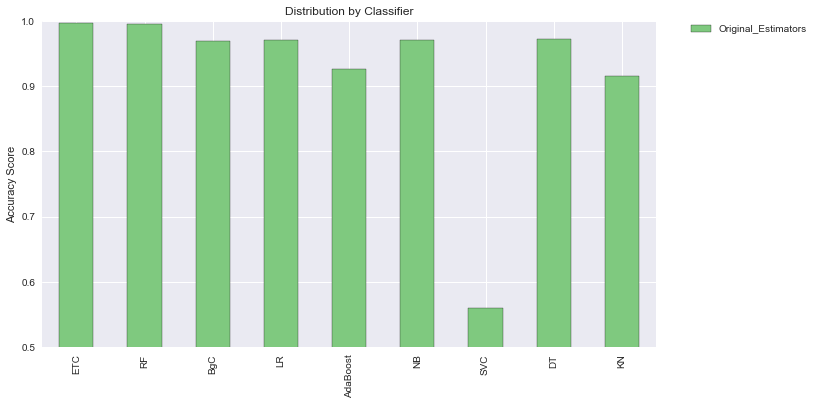

In [40]:
predicted_original.plot(kind='bar', ylim=(0.5, 1.0), figsize=(11, 6), align='center', colormap="Accent")
plt.xticks(np.arange(9), predicted_original.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### So it appears that Random Forest and Extra Tree Classifier perform amazingly well right off the bat ! While Bagging, Logistic Regression, Multinomial NaiveBayes, and Decision Trees Classifier have also performed rather well. Seems like Support Vector does a terrible job compared to the others.

### Let us try adding length as a feature too and compare the results

In [41]:
predicted_scores_len = []
predicted_models_len = {}

predict_models(
    clfs, 
    predicted_scores_len, 
    predicted_models_len, 
    feat_tfidf_len_train, 
    label_tfidf_len_train, 
    feat_tfidf_len_test, 
    label_tfidf_len_test
)

predicted_len = pd.DataFrame.from_items(predicted_scores_len, orient='index', columns=['With_Length'])
predicted_combined = pd.concat([predicted_original, predicted_len], axis=1)
predicted_combined

('starting...', 'ETC')


('ETC', 'Done !')
('starting...', 'RF')


('RF', 'Done !')
('starting...', 'BgC')


('BgC', 'Done !')
('starting...', 'LR')
('LR', 'Done !')
('starting...', 'AdaBoost')


('AdaBoost', 'Done !')
('starting...', 'NB')
('NB', 'Done !')
('starting...', 'SVC')


('SVC', 'Done !')
('starting...', 'DT')


('DT', 'Done !')
('starting...', 'KN')


('KN', 'Done !')


,Original_Estimators,With_Length
ETC,0.997526,0.996289
RF,0.995362,0.994125
BgC,0.969388,0.975263
LR,0.970934,0.961039
AdaBoost,0.926716,0.924861
NB,0.970006,0.925170
SVC,0.560297,0.798701
DT,0.971552,0.975881
KN,0.915275,0.885281


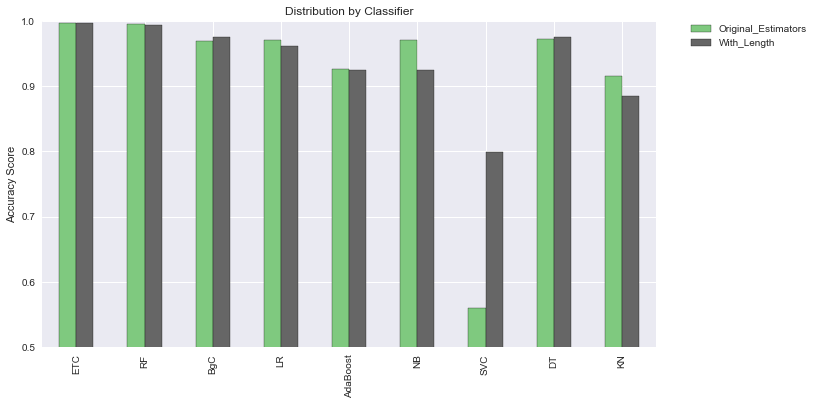

In [42]:
predicted_combined.plot(kind='bar', ylim=(0.5, 1.0), figsize=(11, 6), align='center', colormap="Accent")
plt.xticks(np.arange(9), predicted_combined.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### So it seems with length added as a feature, Support Vector suddenly performs much better but still not up to mark with the rest of the classifiers. It's also apparent that NaiveBayes and K Nearest Neighbor takes a minor hit.

### Let's dig deeper into why Support Vector performs poorly and try tuning some hyper parameters

In [43]:
conf_mat_SVC = confusion_matrix(label_tfidf_len_test, predicted_models_len['SVC'])
conf_mat_SVC_normalized = conf_mat_SVC.astype('float') / conf_mat_SVC.sum(axis=1)[:, np.newaxis]

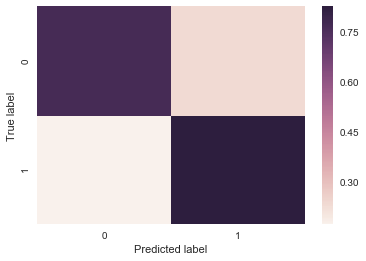

In [44]:
sns.heatmap(conf_mat_SVC_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [45]:
print(conf_mat_SVC)

[[1088  334]
 [ 317 1495]]


In [46]:
print(classification_report(label_tfidf_len_test, predicted_models_len['SVC'], target_names = ["ham", "spam"]))

             precision    recall  f1-score   support

        ham       0.77      0.77      0.77      1422
       spam       0.82      0.83      0.82      1812

avg / total       0.80      0.80      0.80      3234



#### Seems like our False positive rate is slightly higher, but we do have a general f1 score of 0.8. Hence we're not too far from achieving a better result

In [77]:
clfs_tuned = {
    'SVC': SVC(coef0=1.0, gamma=1.0),
    'KN': KNeighborsClassifier(n_neighbors=2), 
    'NB': MultinomialNB(alpha=0.5), 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': AdaBoostClassifier(n_estimators=62, random_state=111),
    'BgC': bc, 
    'ETC': etc
}

predicted_scores_tuned = []
predicted_models_tuned = {}

predict_models(
    clfs_tuned, 
    predicted_scores_tuned, 
    predicted_models_tuned,
    feat_tfidf_len_train, 
    label_tfidf_len_train, 
    feat_tfidf_len_test, 
    label_tfidf_len_test
)

predicted_tuned = pd.DataFrame.from_items(predicted_scores_tuned, orient='index', columns=['Tuned'])
predicted_combined_tuned = pd.concat([predicted_combined, predicted_tuned], axis=1)
predicted_combined_tuned


('starting...', 'ETC')


('ETC', 'Done !')
('starting...', 'RF')


('RF', 'Done !')
('starting...', 'BgC')


('BgC', 'Done !')
('starting...', 'LR')
('LR', 'Done !')
('starting...', 'AdaBoost')


('AdaBoost', 'Done !')
('starting...', 'NB')
('NB', 'Done !')
('starting...', 'SVC')


('SVC', 'Done !')
('starting...', 'DT')


('DT', 'Done !')
('starting...', 'KN')


('KN', 'Done !')


,Original_Estimators,With_Length,Tuned
ETC,0.997526,0.996289,0.995362
RF,0.995362,0.994125,0.994125
BgC,0.969388,0.975263,0.978355
LR,0.970934,0.961039,0.961039
AdaBoost,0.926716,0.924861,0.932900
NB,0.970006,0.925170,0.969697
SVC,0.560297,0.798701,0.950526
DT,0.971552,0.975881,0.974335
KN,0.915275,0.885281,0.945578


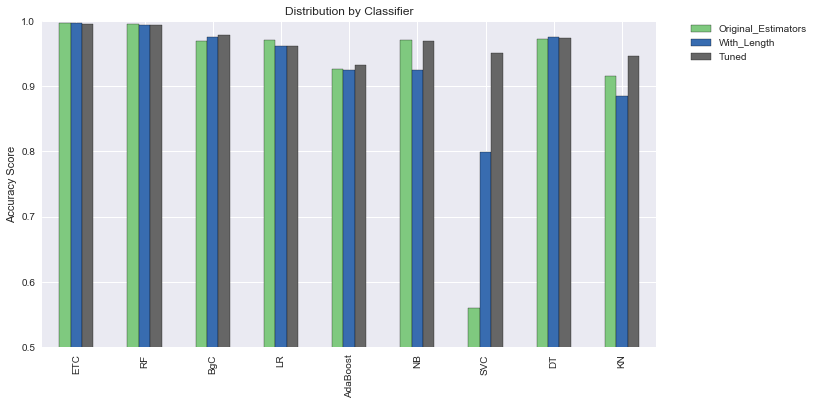

In [78]:
predicted_combined_tuned.plot(kind='bar', ylim=(0.5, 1.0), figsize=(11, 6), align='center', colormap="Accent")
plt.xticks(np.arange(9), predicted_combined_tuned.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### With a little bit of fine tuning some classifiers, we've seen some decent improvements, especially when it comes to Support Vectors. K Nearest Neighnors when given 2 instead of using 5 as it's default K value also sees some improvements. On the otherhand NaiveBayes is back to where it was orginally before we introduced length as a feature.

## Conclusion:
#### The winner is handsdown Random Forest classifiers. Extra Tree is also based on Random Forest but uses even more randomization to help ensure less overfitting. Though after some basic tuning, the rest of the classifiers aren't too far behind either.

## BONUS

### We are using ensemble algorithms here, but what about ensemble of ensembles? Will it beat the champion?

In [80]:
ensemble_vote_classifier = VotingClassifier(estimators=[
    ('BgC', bc), 
    ('ETC', etc), 
    ('RF', rfc), 
    ('Ada', abc)], 
    voting='soft')

ensemble_vote_classifier.fit(feat_tfidf_len_train, label_tfidf_len_train)

pred_ensemble = ensemble_vote_classifier.predict(feat_tfidf_len_test)

print(accuracy_score(label_tfidf_len_test, pred_ensemble))

0.992578849722


### This seems to have place it on par with Random Forest classifiers ! But considering the fact that we had to ensemble them, I will stick by my verdict that Random Forest classifiers are your go to classifiers for sms spam detection